<a href="https://colab.research.google.com/github/Ejanwhy/POSTTEST2-DATA-MINING/blob/main/042_Ferryza_Nurwahyu_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [38]:
import pandas as pd

df1 = pd.read_csv('posttest2.csv')

In [39]:
#Menampilkan data yang telah ditabulasi dan disimpan ke dalam dataframe
df1

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Menghitung total dari setiap item yang ada pada dataframe
df1.sum()

whole milk             5
pasrty                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [41]:
#Menampilkan kolom yang terdapat pada dataframe
print("List Kolom :\n")
for col in df1.columns:
  print(col)
     

List Kolom :

whole milk
pasrty
salty snack
sausage
semi-finished bread
yogurt
soda
pickled vegetables
canned beer
misc. beverages
hygiene articles
rolls/buns
frankfurter
whipped/sour cream
curd
beef
white bread
butter
frozen vegetables
other vegetables
tropical fruit
sugar
butter milk
specialty chocolate
frozen meals
dental care
root vegetables
detergent
dish cleaner
cling film/bags


In [42]:
#Menentukan kombinasi barang yang mungkin terjadi
from itertools import permutations #Library untuk buat kombinasi barang
combi_all = list(permutations(df1.columns, 2)) # untuk menyimpan seluruh kemungkinan kombinasi barang
combi_all # untuk menampilkan keseluruhan hasil kombinasi

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [43]:
#Menentukan kombinasi item yang ada pada dataframe
hasil = [] # Menyimpan data dalam bentuk list
for combi_item in combi_all: # Mengulangi pembacaan dataset
  if len(df1[(df1[combi_item[0]]==1) & (df1[combi_item[1]]==1)]) >0: # Menentukan apakah kombinasi tersebut ada atau tidak
    hasil.append(combi_item) # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
hasil # Menampilkan hasil
     

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

In [44]:
#Menghitung jumlah kombinasi tiap - tiap item set pada dataframe
hasil_akhir = {} # Menyimpan data dalam bentuk dictionary
for itemset in hasil:  # Mengulangi pembacaan dataset
  banyak_data= len(df1[
      (df1[itemset[0]]==1) & (df1[itemset[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  hasil_akhir[str(itemset)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary
hasil_akhir # Menampilkan hasil

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('can

In [45]:
#Menghitung Support
for item,ab in hasil_akhir.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
    support = ab/len(df1)*100 # Menghitung support pada tiap tiap kombinasi item
    print(f"{item} support = {support:.3f}%") # Menampilkan  nilai s

('whole milk', 'pasrty') support = 5.263%
('whole milk', 'salty snack') support = 5.263%
('whole milk', 'sausage') support = 10.526%
('whole milk', 'semi-finished bread') support = 5.263%
('whole milk', 'yogurt') support = 5.263%
('whole milk', 'soda') support = 5.263%
('whole milk', 'rolls/buns') support = 5.263%
('whole milk', 'butter') support = 5.263%
('pasrty', 'whole milk') support = 5.263%
('pasrty', 'salty snack') support = 5.263%
('salty snack', 'whole milk') support = 5.263%
('salty snack', 'pasrty') support = 5.263%
('sausage', 'whole milk') support = 10.526%
('sausage', 'semi-finished bread') support = 5.263%
('sausage', 'yogurt') support = 5.263%
('sausage', 'hygiene articles') support = 5.263%
('sausage', 'rolls/buns') support = 10.526%
('semi-finished bread', 'whole milk') support = 5.263%
('semi-finished bread', 'sausage') support = 5.263%
('semi-finished bread', 'yogurt') support = 5.263%
('yogurt', 'whole milk') support = 5.263%
('yogurt', 'sausage') support = 5.263%


In [46]:
#Menghitung Confidence
for item,ab in hasil_akhir.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  # A -> B 
  i = eval(item) # Ubah ke list dari string
  confidence = ab/df1[i[0]].sum()*100 # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya
  print(f"{i[0]}->{i[1]}  Confidence = {confidence:.1f}%") # Menampilka

whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pasrty  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->whole

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

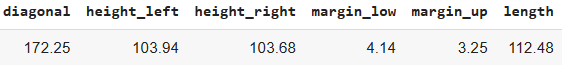
<!-- 1412 -->

In [47]:
df2 = pd.read_csv('deteksi_uang_palsu.csv')

In [48]:
#Menampilkan dataframe dalam bentuk tabel
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [49]:
#Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - new_data['diagonal'].values[0])**2
    + (df2['height_left'] - new_data['height_left'].values[0])**2
    + (df2['height_right'] - new_data['height_right'].values[0])**2
    + (df2['margin_low'] - new_data['margin_low'].values[0])**2
    + (df2['margin_up'] - new_data['margin_up'].values[0])**2
    + (df2['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


In [50]:
#Menambahkan kolom jarak

# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df2)
     

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

In [51]:
#Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

# Mengurutkan data dari kecil ke besar
sorted = df2.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df2)))

# Menentukan data terdekat
data_terdekat = sorted.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


In [52]:
#Menentukan hasil prediksi berdasarkan label terbanyak

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Ferryza Nurwahyu

> Nim : 2109116042


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

#Judul

##Memprediksi Akreditasi Sekolah dengan metode Supervised Learning

##Business Understanding
Akreditasi sekolah adalah proses penilaian yang dilakukan oleh lembaga independen terhadap kualitas pendidikan yang diberikan oleh sebuah sekolah. Akreditasi ini bertujuan untuk menjamin bahwa sekolah tersebut memenuhi standar kualitas pendidikan yang telah ditetapkan dan memberikan jaminan kepada masyarakat bahwa lulusan dari sekolah tersebut memiliki kualitas yang diakui secara nasional.

Proses akreditasi ini mencakup penilaian terhadap aspek-aspek penting dalam pendidikan seperti kurikulum, tenaga pengajar, sarana dan prasarana, serta sistem penilaian. Hasil dari proses akreditasi ini dapat digunakan oleh pihak-pihak terkait, seperti orang tua murid, pihak sponsor, dan lembaga pendidikan untuk memperbaiki kualitas pendidikan dan meningkatkan kepercayaan masyarakat terhadap sekolah tersebut.

Dengan adanya akreditasi sekolah, diharapkan mampu meningkatkan kualitas pendidikan di Indonesia dan mendorong munculnya sekolah-sekolah yang berkualitas, berintegritas, dan memiliki kredibilitas yang tinggi di mata masyarakat.

##Data Understanding
###Collect Initial Data
data dapat dilihat pada link berikut : https://www.kaggle.com/datasets/ardyharoen/akreditasisekolah

In [53]:
# Import data ke dalam sebuah dataframe dengan nama df3

import pandas as pd
df3 = pd.read_csv('data.csv')

###Describe Data
pada bagian ini menampilkan semua data dari dataset

In [54]:
# Menampilkan data 
df3

,id,bentuk,status,provinsi,guru,siswa_laki_laki,siswa_perempuan,rombongan_belajar,kurikulum,penyelenggaraan,akses_internet,sumber_listrik,ruang_kelas,laboratorium,perpustakaan,sanitasi_siswa,jumlah_siswa,siswa_mengulang_jenis_kelamin_laki_laki,siswa_mengulang_jenis_kelamin_perempuan,siswa_baru_jenis_kelamin_laki_laki,siswa_baru_jenis_kelamin_perempuan,guru_status_pns,guru_status_honor,jumlah_guru_sertifikasi,guru_sertifikasi_sudah,guru_jenis_kelamin_laki_laki,guru_jenis_kelamin_perempuan,jumlah_ptk_status,ptk_status_pns,ptk_status_honor,ptk_jenis_kelamin_laki_laki,ptk_jenis_kelamin_perempuan,jumlah_ruang_kelas_baik,jumlah_ruang_kelas_rusak_ringan,jumlah_ruang_kelas_rusak_sedang,jumlah_ruang_kelas_rusak_berat,jumlah_lab_ipa,jumlah_lab_biologi,jumlah_lab_kimia,jumlah_lab_fisika,jumlah_lab_bahasa,jumlah_lab_ips,jumlah_lab_komputer,perpustakaan_baik,sanitasi_guru_baik,sanitasi_siswa_baik,akreditasi
0,0,SD,N,18,14.0,151.0,170.0,12.0,K-13,Pagi/6h,True,True,12.0,0.0,1.0,2.0,321.0,5.0,0.0,17.0,36.0,11.0,3.0,14.0,10.0,2.0,12.0,2.0,1.0,1.0,0.0,2.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2
1,1,SD,N,9,25.0,314.0,282.0,20.0,K-13,Double Shift/6h,False,True,13.0,0.0,1.0,7.0,596.0,20.0,5.0,66.0,43.0,22.0,0.0,25.0,20.0,3.0,22.0,3.0,3.0,0.0,2.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,7.0,1
2,2,SD,N,11,9.0,73.0,76.0,6.0,K-13,Pagi/6h,False,True,6.0,0.0,1.0,2.0,149.0,3.0,2.0,15.0,19.0,5.0,3.0,9.0,2.0,5.0,4.0,2.0,1.0,1.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,SD,S,13,7.0,151.0,113.0,11.0,K-13,Pagi/6h,False,True,12.0,1.0,1.0,2.0,264.0,2.0,0.0,21.0,10.0,0.0,1.0,7.0,0.0,3.0,4.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1
4,4,SMA,S,0,33.0,293.0,381.0,20.0,KTSP,Pagi/6h,True,True,20.0,0.0,0.0,2.0,674.0,0.0,0.0,107.0,122.0,0.0,0.0,33.0,6.0,10.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55581,55581,SMK,S,2,31.0,118.0,198.0,14.0,KTSP,Sehari Penuh/6h,False,True,14.0,0.0,1.0,2.0,316.0,0.0,0.0,44.0,58.0,2.0,12.0,31.0,5.0,14.0,17.0,3.0,0.0,3.0,6.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,1
55582,55582,SD,S,11,11.0,53.0,43.0,6.0,KTSP,Pagi/6h,True,True,6.0,0.0,1.0,2.0,96.0,0.0,0.0,6.0,9.0,4.0,1.0,11.0,5.0,5.0,6.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1
55583,55583,SMK,S,0,11.0,191.0,2.0,11.0,KTSP,Pagi/6h,True,True,11.0,1.0,2.0,2.0,193.0,0.0,0.0,52.0,1.0,1.0,0.0,11.0,5.0,5.0,6.0,0.0,0.0,0.0,1.0,0.0,2.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2
55584,55584,SMK,S,7,10.0,135.0,82.0,8.0,KTSP,Pagi/6h,True,True,12.0,0.0,1.0,2.0,217.0,0.0,0.0,51.0,30.0,0.0,1.0,10.0,0.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


In [55]:
print("Daftar kolom yang ada pada dataframe :")
for col in df3.columns:
  print(col)

Daftar kolom yang ada pada dataframe :
id
bentuk
status
provinsi
guru
siswa_laki_laki
siswa_perempuan
rombongan_belajar
kurikulum
penyelenggaraan
akses_internet
sumber_listrik
ruang_kelas
laboratorium
perpustakaan
sanitasi_siswa
jumlah_siswa
siswa_mengulang_jenis_kelamin_laki_laki
siswa_mengulang_jenis_kelamin_perempuan
siswa_baru_jenis_kelamin_laki_laki
siswa_baru_jenis_kelamin_perempuan
guru_status_pns
guru_status_honor
jumlah_guru_sertifikasi
guru_sertifikasi_sudah
guru_jenis_kelamin_laki_laki
guru_jenis_kelamin_perempuan
jumlah_ptk_status
ptk_status_pns
ptk_status_honor
ptk_jenis_kelamin_laki_laki
ptk_jenis_kelamin_perempuan
jumlah_ruang_kelas_baik
jumlah_ruang_kelas_rusak_ringan
jumlah_ruang_kelas_rusak_sedang
jumlah_ruang_kelas_rusak_berat
jumlah_lab_ipa
jumlah_lab_biologi
jumlah_lab_kimia
jumlah_lab_fisika
jumlah_lab_bahasa
jumlah_lab_ips
jumlah_lab_komputer
perpustakaan_baik
sanitasi_guru_baik
sanitasi_siswa_baik
akreditasi


###Explore Data

<Axes: xlabel='bentuk', ylabel='count'>

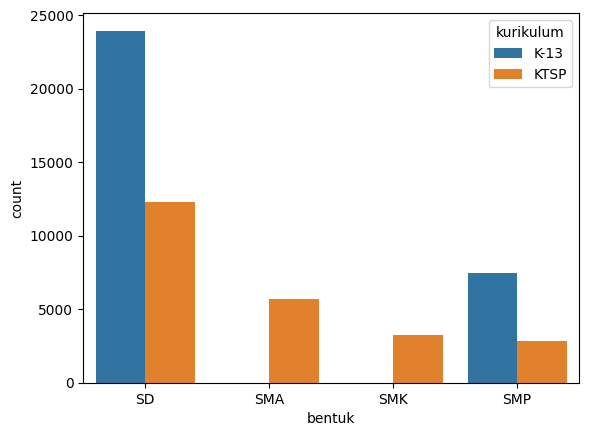

In [56]:
import seaborn as sns

sns.countplot(data=df3,x="bentuk",hue="kurikulum")

<Axes: xlabel='bentuk', ylabel='count'>

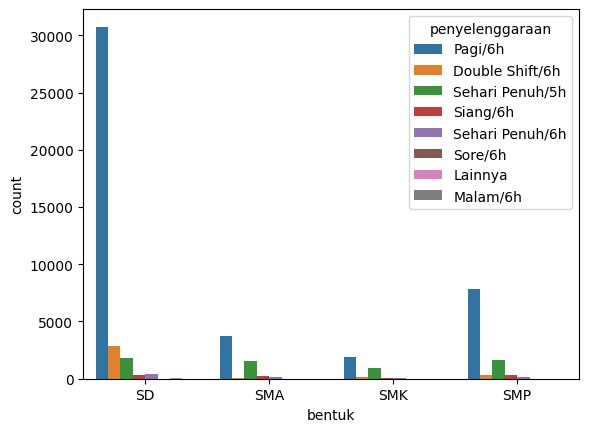

In [57]:
sns.countplot(data=df3,x="bentuk",hue="penyelenggaraan")

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


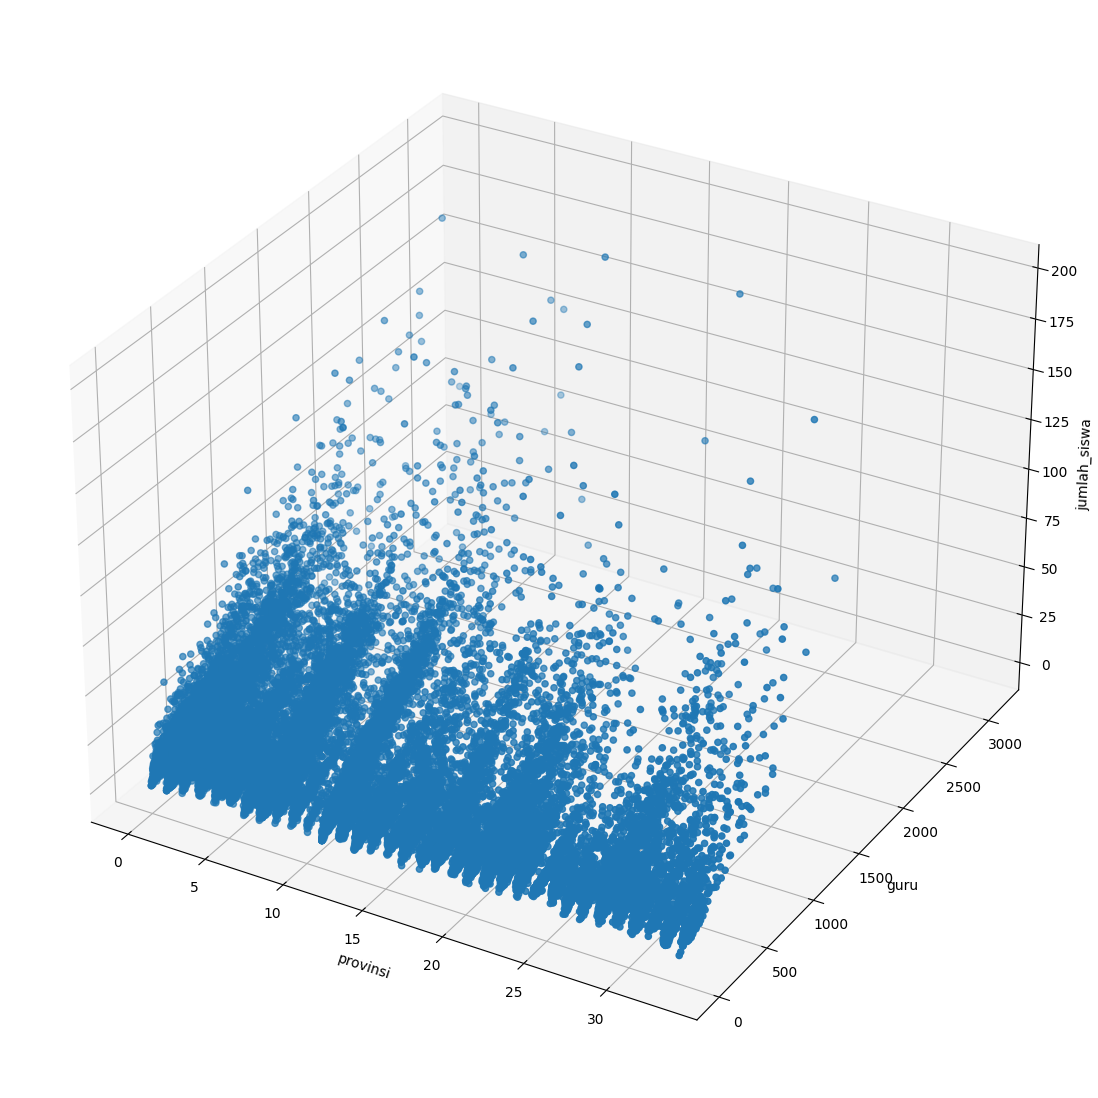

In [58]:
import matplotlib.pyplot as plot

plot.figure(figsize=(15,14))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(df3['provinsi'],df3['jumlah_siswa'],df3['guru'])

axes.set_xlabel('provinsi')
axes.set_ylabel('guru')
axes.set_zlabel('jumlah_siswa')
plot.show()

###Verify Data Quality
melakukan verifikasi data berdasarkan validitas data dan duplikasi data

#####Validitas data
data tersebut dapat dicek validitasnya pada link berikut : https://www.kaggle.com/datasets/ardyharoen/akreditasisekolah

#####Duplikasi Data

In [59]:
is_duplicated = df3.duplicated().any()

print("Status Duplikasi :",is_duplicated)

Status Duplikasi : False


##Data Preparation

####Select Data

In [60]:
df3 = pd.read_csv('data.csv')

###Clean Data

In [61]:
df3 = df3.dropna()

In [62]:
df3.isna().sum()

id                                         0
bentuk                                     0
status                                     0
provinsi                                   0
guru                                       0
siswa_laki_laki                            0
siswa_perempuan                            0
rombongan_belajar                          0
kurikulum                                  0
penyelenggaraan                            0
akses_internet                             0
sumber_listrik                             0
ruang_kelas                                0
laboratorium                               0
perpustakaan                               0
sanitasi_siswa                             0
jumlah_siswa                               0
siswa_mengulang_jenis_kelamin_laki_laki    0
siswa_mengulang_jenis_kelamin_perempuan    0
siswa_baru_jenis_kelamin_laki_laki         0
siswa_baru_jenis_kelamin_perempuan         0
guru_status_pns                            0
guru_statu

###Transform Data

In [63]:
df3 = pd.get_dummies(df3)
print(df3)

          id  provinsi  guru  siswa_laki_laki  siswa_perempuan  rombongan_belajar  akses_internet  sumber_listrik  ruang_kelas  laboratorium  perpustakaan  sanitasi_siswa  jumlah_siswa  \
0          0        18  14.0            151.0            170.0               12.0            True            True         12.0           0.0           1.0             2.0         321.0   
1          1         9  25.0            314.0            282.0               20.0           False            True         13.0           0.0           1.0             7.0         596.0   
2          2        11   9.0             73.0             76.0                6.0           False            True          6.0           0.0           1.0             2.0         149.0   
3          3        13   7.0            151.0            113.0               11.0           False            True         12.0           1.0           1.0             2.0         264.0   
4          4         0  33.0            293.0            381

###Data Reduction

In [64]:
data = df3.drop(columns=["provinsi", "siswa_laki_laki", "siswa_perempuan", "rombongan_belajar", "akses_internet", "sumber_listrik", "ruang_kelas", "laboratorium", "perpustakaan", "sanitasi_siswa", "siswa_mengulang_jenis_kelamin_laki_laki", "siswa_mengulang_jenis_kelamin_perempuan", "siswa_baru_jenis_kelamin_laki_laki", "siswa_baru_jenis_kelamin_perempuan", "guru_status_pns", "guru_status_honor", "jumlah_guru_sertifikasi", "guru_sertifikasi_sudah", "guru_jenis_kelamin_laki_laki", "guru_jenis_kelamin_perempuan", "jumlah_ptk_status", "ptk_status_pns", "ptk_status_honor", "ptk_jenis_kelamin_laki_laki", "status_N", "status_S", "penyelenggaraan_Malam/6h", "penyelenggaraan_Pagi/6h", "penyelenggaraan_Sehari Penuh/5h", "penyelenggaraan_Double Shift/6h", "penyelenggaraan_Lainnya", "penyelenggaraan_Sehari Penuh/6h", "penyelenggaraan_Siang/6h", "penyelenggaraan_Sore/6h", "bentuk_SD", "bentuk_SMA", "bentuk_SMK", "bentuk_SMP", "penyelenggaraan_Lainnya","ptk_jenis_kelamin_perempuan","kurikulum_K-13","kurikulum_KTSP", "perpustakaan_baik", "sanitasi_guru_baik", "sanitasi_siswa_baik",])
data

,id,guru,jumlah_siswa,jumlah_ruang_kelas_baik,jumlah_ruang_kelas_rusak_ringan,jumlah_ruang_kelas_rusak_sedang,jumlah_ruang_kelas_rusak_berat,jumlah_lab_ipa,jumlah_lab_biologi,jumlah_lab_kimia,jumlah_lab_fisika,jumlah_lab_bahasa,jumlah_lab_ips,jumlah_lab_komputer,akreditasi
0,0,14.0,321.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1,25.0,596.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,9.0,149.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,7.0,264.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,4,33.0,674.0,1.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55581,55581,31.0,316.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
55582,55582,11.0,96.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
55583,55583,11.0,193.0,2.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2
55584,55584,10.0,217.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


###Slicing Data

In [65]:
data = data.iloc[0:501,:]
data

,id,guru,jumlah_siswa,jumlah_ruang_kelas_baik,jumlah_ruang_kelas_rusak_ringan,jumlah_ruang_kelas_rusak_sedang,jumlah_ruang_kelas_rusak_berat,jumlah_lab_ipa,jumlah_lab_biologi,jumlah_lab_kimia,jumlah_lab_fisika,jumlah_lab_bahasa,jumlah_lab_ips,jumlah_lab_komputer,akreditasi
0,0,14.0,321.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1,25.0,596.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,9.0,149.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,7.0,264.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,4,33.0,674.0,1.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,497,7.0,174.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
498,498,11.0,166.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
499,499,8.0,36.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
500,500,27.0,238.0,0.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1


###Split Data

In [66]:

from sklearn.model_selection import train_test_split
x = data.drop('akreditasi',axis=1)
y = data['akreditasi']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Data Latih Yang Akan Digunakan :\n",x_train)
print("Data Uji Yang Akan Digunakan :\n",x_test)

Data Latih Yang Akan Digunakan :
       id  guru  jumlah_siswa  jumlah_ruang_kelas_baik  jumlah_ruang_kelas_rusak_ringan  jumlah_ruang_kelas_rusak_sedang  jumlah_ruang_kelas_rusak_berat  jumlah_lab_ipa  jumlah_lab_biologi  \
116  116   9.0         147.0                      0.0                              5.0                              0.0                             1.0             0.0                 0.0   
45    45  10.0         214.0                      1.0                              6.0                              0.0                             1.0             0.0                 0.0   
16    16   7.0          52.0                      0.0                              2.0                              0.0                             6.0             0.0                 0.0   
464  464  49.0         632.0                      0.0                             24.0                              0.0                             0.0             1.0                 0.0   
358  358   

#Kesimpulan
Kesimpulan dari hasil proses memprediksi akreditasi sekolah dengan metode supervised learning dapat digunakan untuk membantu sekolah dalam melakukan evaluasi dan perbaikan kualitas pendidikan. Dengan menggunakan model yang tepat, sekolah dapat memprediksi kemungkinan akreditasi yang akan didapat berdasarkan data yang dimiliki. Hal ini dapat membantu sekolah dalam merencanakan strategi dan program perbaikan yang sesuai untuk memperbaiki kualitas pendidikan.

Namun, perlu diingat bahwa hasil prediksi tidak sepenuhnya akurat dan bergantung pada kualitas data yang digunakan dan model yang dibangun. Oleh karena itu, penting untuk terus meningkatkan kualitas data dan mengembangkan model yang lebih baik untuk mendapatkan hasil prediksi yang lebih akurat. Selain itu, hasil prediksi juga harus diperiksa dan divalidasi oleh ahli pendidikan untuk memastikan bahwa hasil yang diperoleh dapat diandalkan dan benar-benar mencerminkan kualitas pendidikan di sekolah tersebut.